### Studio del comportamento della dispersione di soglia in funzione delle capacità $C_D$ con soglia ~1000e e $I_{LDAC}$ ~ $14 \mu A$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.patches as mpatches

In [2]:
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

In [3]:
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_0_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_50_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_100_soglia_1500_elettroni_I_LDAC_14_0.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test capacit soglia 1500 passo cal 2/calib_CD_150_soglia_1500_elettroni_I_LDAC_14_0.txt


In [4]:
data = parseCalibs(button.files) #estrapolo i dati dei file di configurazione

4 dataframe crated!


In [5]:
capac = [0.0, 50.0, 100.0, 150.0]

In [6]:
def getElectronsTh(dataframe, tipo):
    deltas = []
    for i in dataframe:
        #filtered_type = i[0].loc[(i[0]['Tipo'] == tipo) & (i[0]['Channel'] != 148) & (i[0]['Channel'] != 194) & (i[0]['Channel'] != 196) & (i[0]['Channel'] != 235) ] ###attenzione!!

        filtered_type = i[0].loc[(i[0]['Tipo'] == tipo) & (i[0]['Channel'] != 67.0)] ###attenzione!!
        thresholds = filtered_type['Thresholds'].values.tolist()
        #calcola deltaCALHI, converte in elettroni e arrotonda alla seconda cifra decimale
        deltaCALHI = [round(50*(x - 500.0), 2) for x in thresholds]
        deltas.append(deltaCALHI)
    return deltas

In [7]:
deltasA = getElectronsTh(data, "A")
deltasB = getElectronsTh(data, "B")

In [8]:
devA = [np.std(x) for x in deltasA] #calcolo deviazioni standard
devB = [np.std(x) for x in deltasB]

In [9]:
devA

[50.97620159693835, 54.8710272619261, 62.84181022412466, 68.07744198951461]

In [10]:
devB

[28.034053635985398, 29.096973190557822, 31.60105369109953, 33.611012709864205]

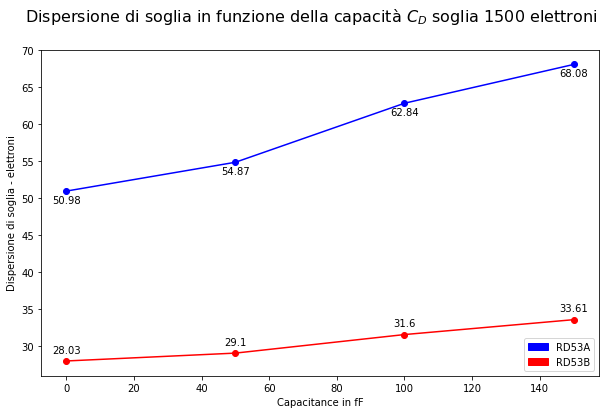

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(capac, devA, '-o', color ="blue")
ax.plot(capac, devB, '-o', color = "red")
ax.set_xlabel("Capacitance in fF")
ax.set_ylabel("Dispersione di soglia - elettroni")

blue_patch = mpatches.Patch(color='blue', label="RD53A")
red_patch = mpatches.Patch(color='red', label="RD53B")

ax.legend(loc="lower right", handles=[blue_patch, red_patch])

for i, txt in enumerate(devA):        
    ax.annotate(round(txt,2), #text
                (capac[i], devA[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,-12), #txt distance from the point
               ha='center') #horizontal alignment
    

for i, txt in enumerate(devB):  
    ax.annotate(round(txt,2), #text
                (capac[i], devB[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,8), #txt distance from the point
               ha='center') #horizontal alignment


fig.suptitle("Dispersione di soglia in funzione della capacità $C_D$ soglia 1500 elettroni", fontsize=16)
#plt.savefig('Dispersione di soglia in funzione della capacità CD soglia 1500.png', bbox_inches='tight')
plt.show()

   

In [9]:
def getErrorFunctionSigma(dataframe, tipo):
    data = []    
    for i in dataframe:
        filtered_type = i[0].loc[(i[0]['Tipo'] == tipo) & (i[0]['Channel'] != 148) & (i[0]['Channel'] != 194) & (i[0]['Channel'] != 196) & (i[0]['Channel'] != 235) ] ###attenzione!!

        #filtered_type = i[0].loc[(i[0]['Tipo'] == tipo)] ###attenzione!!
        sigmas = filtered_type['ErrFunSigma'].values.tolist()
        data.append(sigmas)
    return data

In [10]:
sigmasA = getErrorFunctionSigma(data, "A")
sigmasB = getErrorFunctionSigma(data, "B")

In [11]:
ENC_B = []
for i in sigmasB:
    ENC_B.append(np.mean(np.asarray(i)))

In [12]:
ENC_A = []
for i in sigmasA:
    ENC_A.append(np.mean(np.asarray(i)))

In [13]:
#converto in elettroni
ENC_B = [x*50 for x in ENC_B]
ENC_A = [x*50 for x in ENC_A]

In [14]:
A2 = [x**2 for x in ENC_A]
B2 = [x**2 for x in ENC_B]
varA = [x**2 for x in devA]
varB = [x**2 for x in devB]

print(A2)
print(varA)

[4536.075531651064, 7181.5615506231015, 10909.555769111537, 15456.167214334439]
[2598.5731292517003, 3010.8296327790376, 3949.0931122448983, 4634.538107835727]


In [15]:
prestazioni_A = []
prestazioni_B = []

for i in range(0, len(A2)):
    prestazioni_A.append(np.sqrt(A2[i]+varA[i]))
    prestazioni_B.append(np.sqrt(B2[i]+varB[i]))

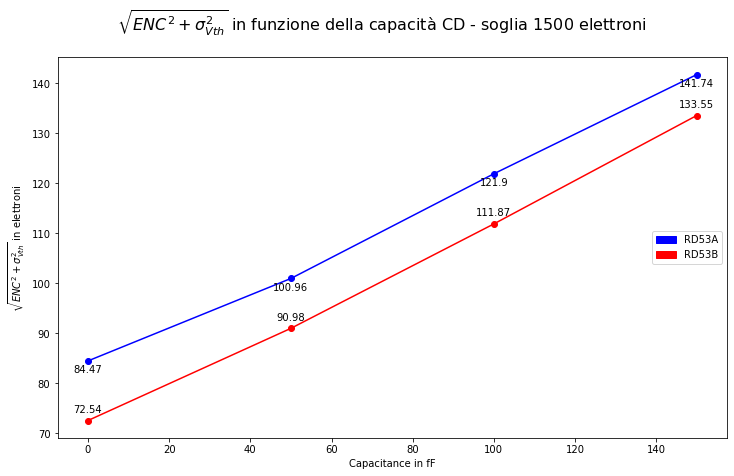

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,7))

ax.plot(capac, prestazioni_A, '-o', color ="blue")
ax.plot(capac, prestazioni_B, '-o', color = "red")
ax.set_xlabel("Capacitance in fF")
ax.set_ylabel("$\sqrt{ENC^{2} + \sigma_{Vth}^{2}}$ in elettroni")



blue_patch = mpatches.Patch(color='blue', label="RD53A")
red_patch = mpatches.Patch(color='red', label="RD53B")

ax.legend(loc="center right", handles=[blue_patch, red_patch])

for i, txt in enumerate(prestazioni_A):        
    ax.annotate(round(txt,2), #text
                (capac[i], prestazioni_A[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,-12), #txt distance from the point
               ha='center') #horizontal alignment
    

for i, txt in enumerate(prestazioni_B):  
    ax.annotate(round(txt,2), #text
                (capac[i], prestazioni_B[i]), #point
               textcoords = "offset points", #positioning
               xytext= (0,8), #txt distance from the point
               ha='center') #horizontal alignment

fig.suptitle("$\sqrt{ENC^{2} + \sigma_{Vth}^{2}}$ in funzione della capacità CD - soglia 1500 elettroni", fontsize=16)
plt.savefig('Prestazioni in funzione della capacità CD - 1500 elettroni.png', bbox_inches='tight')
plt.show()